In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

**# Step 1: Load datasets**

In [27]:
customers = pd.read_csv('/Customers.csv')
transactions = pd.read_csv('/Transactions.csv')


**# Step 2: Merge datasets**

In [28]:
customer_data = transactions.merge(customers, on='CustomerID')

**# Step 3: Feature Engineering**

In [29]:
customer_features = customer_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',            # Total transaction value
    'Quantity': 'sum',              # Total quantity purchased
    'TransactionID': 'count',       # Number of transactions
    'Region': 'first'               # Region of the customer
}).rename(columns={'TransactionID': 'TransactionCount'}).reset_index()

**# Encode categorical features**

In [30]:
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

**# Step 4: Normalize the features**

In [31]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.iloc[:, 1:])

**# Step 5: Determine the optimal number of clusters using the Elbow Method**

In [32]:
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

**# Plot the Elbow Method**

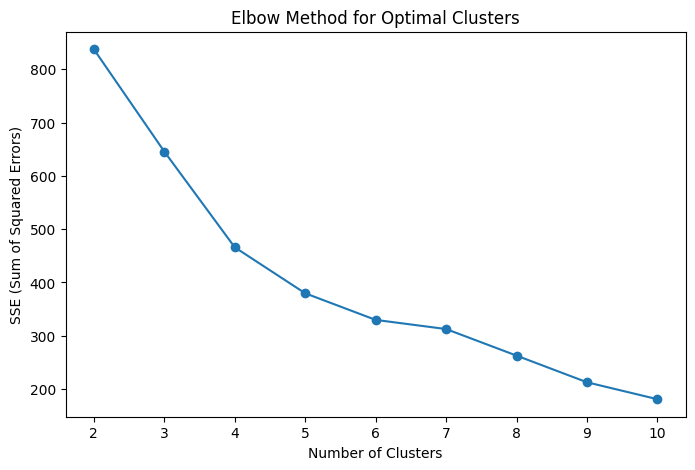

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.show()

**# Step 6: Fit KMeans with the optimal number of clusters (based on the Elbow Plot)**

In [34]:
optimal_clusters = 4  # Adjust based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

**# Add cluster labels to the customer features**

In [35]:
customer_features['Cluster'] = clusters

**# Step 7: Calculate Davies-Bouldin Index**

In [36]:
db_index = davies_bouldin_score(scaled_features, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.9880667545355788


**# Step 8: Visualize clusters using PCA**

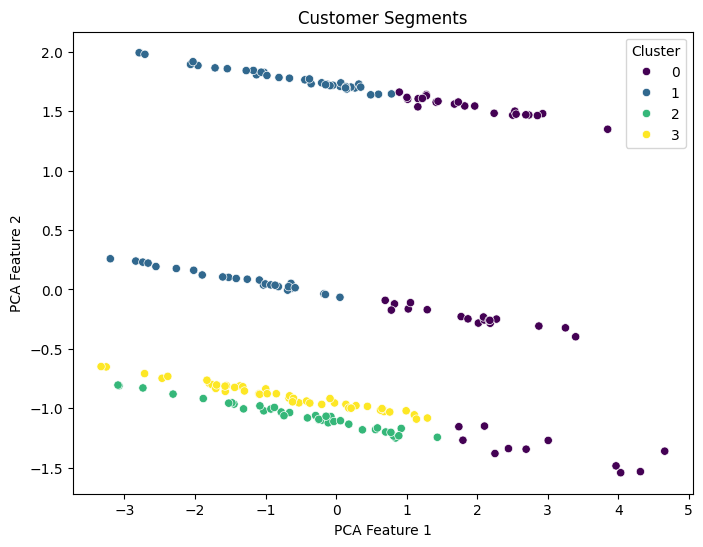

In [37]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend(title='Cluster')
plt.show()
